# Introduction

* The dataset is a classification type dataset.
* These classes are usally categorical, such as positive, negative and neutral sentiments.
* Thus, a Twitter sentiment analysis dataset is designed for classification tasks where the goal is to assign one of several categorical labels (sentiments) to each tweet.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Reading dataset/csv file
train_data =  pd.read_csv(r"C:\Users\sahil\Desktop\AI and DL\project\archive (21)\train.csv", encoding ='latin1')
test_data =  pd.read_csv(r"C:\Users\sahil\Desktop\AI and DL\project\archive (21)\test.csv",encoding='latin1')

In [5]:
train_data.head() #getting top 5 rows

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
test_data.head() #getting top 5 rows

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
train_data.isna().sum() #checking null values

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
test_data.isna().any()  #checking null values

textID              True
text                True
sentiment           True
Time of Tweet       True
Age of User         True
Country             True
Population -2020    True
Land Area (Km²)     True
Density (P/Km²)     True
dtype: bool

In [9]:
train_data.dropna()#dropping null values

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [10]:
#saving it in train_data & test_data
train_data = train_data[['text','sentiment']]
test_data = test_data[['text','sentiment']]

In [11]:
train_data['text'].fillna('',inplace=True)
test_data['text'].fillna('',inplace=True)

In [12]:
#saved column into sentiment
sentiment = train_data["sentiment"]
sentiment

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object

In [13]:
#created function to give labels to categorical data for further tests.
def func(sentiment):
    if sentiment =='positive':
        return 1;
    elif sentiment =='negative':
        return 0;
    else:
        return 2;
train_data['sentiment'] = train_data['sentiment'].apply(func) #saving and applying the fuction
test_data['sentiment'] = test_data['sentiment'].apply(func)   

In [14]:
#converted into list
x_train = np.array(train_data['text'].tolist())
y_train = np.array(train_data['sentiment'].tolist())
x_test = np.array(test_data['text'].tolist())
y_test = np.array(test_data['sentiment'].tolist())

In [15]:
x_train

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype='<U159')

In [16]:
y_train

array([2, 0, 0, ..., 1, 1, 2])

In [17]:
from keras.utils import to_categorical # used for converting into  binary class matrix.

In [18]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [19]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
tokens = Tokenizer()

In [21]:
#breaking text into tokens
tokens.fit_on_texts(x_train) 
tokens.fit_on_texts(x_test)

In [22]:
vocab = len(tokens.word_index)+1
vocab

28615

In [23]:
##converting list of texts into sequence of integers
seq = tokens.texts_to_sequences(x_train)
test_seq = tokens.texts_to_sequences(x_test)

In [24]:
seq

[[1, 162, 19, 7713, 71, 1, 151, 49],
 [422, 117, 1, 63, 94, 7, 91, 10, 1446, 2232],
 [5, 1406, 9, 11272, 16],
 [51, 1189, 353, 16, 493],
 [4274, 13, 118, 472, 14, 72, 330, 132, 17, 3, 7714, 50, 209, 567],
 [41,
  398,
  11273,
  59,
  11274,
  74,
  11275,
  6015,
  12,
  3,
  164,
  6016,
  2506,
  17,
  1316],
 [3413, 11276, 12, 3, 287, 37, 107, 85, 90, 9, 29, 2507, 8, 11277],
 [568, 569],
 [423, 13, 7],
 [2363, 253, 56, 22, 2671, 3793, 517, 9, 15, 1226],
 [82,
  86,
  82,
  1,
  43,
  2,
  25,
  3118,
  1,
  3414,
  3,
  4275,
  37,
  7715,
  226,
  1,
  21,
  168,
  128,
  36,
  5,
  733,
  8,
  329],
 [1, 62, 62, 39, 3, 290, 43, 781, 124, 1109, 2364],
 [5, 11278, 9, 559, 11279, 1004, 17, 6017],
 [1, 79, 2, 40, 2, 320, 120, 20, 1, 307, 5, 1058],
 [586, 586, 54, 3, 4980, 11280],
 [1447, 83, 1, 67, 3119],
 [11, 179, 228, 2, 4981, 7716, 82, 50, 1685, 587],
 [1,
  122,
  103,
  193,
  12,
  3,
  676,
  335,
  156,
  8,
  3794,
  5,
  324,
  252,
  6018,
  71,
  1,
  416,
  19,
  4,
  1

In [25]:
#checking the max_length
maximum_len = max([len(i) for i in seq])
maximum_len 

35

In [26]:
max_length=100
max_length

100

In [27]:
#used to ensure all sequences in dataswt have the same length.
pad_seq = sequence.pad_sequences(seq, maxlen=maximum_len, padding="post")
pad_test_seq = sequence.pad_sequences(test_seq, maxlen=maximum_len, padding="post")

In [28]:
pad_seq[0]

array([   1,  162,   19, 7713,   71,    1,  151,   49,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

In [29]:
#checking shape
pad_seq.shape

(27481, 35)

In [30]:
#used for buliding the nueral netwroks.
model = Sequential([
    Embedding(vocab,50, input_length=maximum_len),
    SimpleRNN(35),
    Dense(3, activation="softmax")    
])

In [31]:
#used to configure the learning process for the model.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
history = model.fit(pad_seq,y_train, epochs=10, validation_data=(pad_test_seq, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4989 - loss: 0.9829 - val_accuracy: 0.7429 - val_loss: 0.7626
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7206 - loss: 0.6757 - val_accuracy: 0.7533 - val_loss: 0.6619
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8364 - loss: 0.4481 - val_accuracy: 0.7396 - val_loss: 0.6765
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9122 - loss: 0.2650 - val_accuracy: 0.7273 - val_loss: 0.7950
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9430 - loss: 0.1743 - val_accuracy: 0.6891 - val_loss: 0.9492
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9584 - loss: 0.1273 - val_accuracy: 0.7057 - val_loss: 1.0097
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9680 - loss: 0.0991 - val_accuracy: 0.6976 - val_loss: 1.1302
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9720 - loss: 0.0874 - 

In [33]:
#creating dictionary
class_names = {0: "Positive",
              1: "Negative",
              2: "Neutral"}

In [34]:
# taken a text to check model is whether predicting correct sentiment or not.
new_review = " What did you get?  My day is alright.. haven`t done anything yet. leaving soon to my stepsister though!"

In [35]:
new_seq = tokens.texts_to_sequences([new_review])

In [36]:
new_seq

[[51,
  126,
  7,
  36,
  5,
  23,
  9,
  972,
  394,
  14,
  188,
  328,
  227,
  585,
  175,
  2,
  5,
  26676,
  131]]

In [37]:
new_padded_seq = sequence.pad_sequences(new_seq, maxlen=max_length, padding="post")

In [38]:
new_padded_seq

array([[   51,   126,     7,    36,     5,    23,     9,   972,   394,
           14,   188,   328,   227,   585,   175,     2,     5, 26676,
          131,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

In [39]:
prob = model.predict(new_padded_seq) #predictting the sentiment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [40]:
class_names[np.argmax(prob)] #argamx used to find the index of maximun value along specified axis.

'Negative'

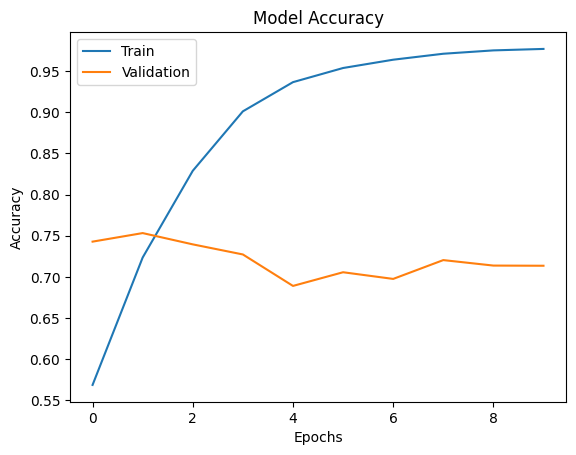

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

* The model's Training accuracy is increasing as it goes upto 97%.
* The model's validation accuracy is seen between 70 to 75%.
* The model has been trained on 10 epochs.

## plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("MOdel Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Validation_loss"])
plt.show()

* The models loss has been decreased till 0.06
* The validation loss has been seemed to be increasing till 1.259.